# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.xlsx` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re
import requests

In [16]:
sps = pd.read_excel('data/Software Professionals Salary.xlsx')

1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [17]:
def shape_df(df):
    print('This dataframe has', df.shape[0],'rows and', df.shape[1],'columns.' )

In [18]:
shape_df(sps)

This dataframe has 22770 rows and 8 columns.


2. How many unique `Job Roles` are there in the dataset? 

In [19]:
unique_job_roles = len(sps['Job Roles'].unique())
print('In the dataframe there are', unique_job_roles,'unique job roles.')

In the dataframe there are 11 unique job roles.


3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [20]:
unique_python_roles = len(sps[sps['Job Roles']=='Python']['Job Title'].unique())
print('In the dataframe there are', unique_python_roles,'unique Python roles.')

In the dataframe there are 102 unique Python roles.


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [21]:
python_and_analyst = len(sps[(sps['Job Roles']=='Python') & (sps['Job Title'].str.contains('Analyst'))])
print(python_and_analyst)

3


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [22]:
salaries_reported = sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum()
salaries_reported_sorted = salaries_reported.sort_values('Salaries Reported', ascending=False)
print('The company that has the highest number of reported salaries is:',salaries_reported_sorted.iloc[0]['Company Name'])

The company that has the highest number of reported salaries is: Amazon


In [23]:
#cmp = sps.groupby('Company Name', as_index=False)['Salaries Reported'].size()
#cmp.sort_values('Salaries Reported', ascending=False)

6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [24]:
num_amazon_locations = len(sps[sps['Company Name']=='Amazon']['Location'].unique())
print('The company Amazon is present in', num_amazon_locations,'locations.')

The company Amazon is present in 9 locations.


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [25]:
url = 'https://open.er-api.com/v6/latest/USD'
r = requests.get(url)
r.status_code

200

In [26]:
#r_json = r.json()
#rates = pd.DataFrame(r_json['rates'])
#rates = pd.DataFrame(r.json()['rates'])

In [27]:
inr = r.json()['rates']['INR']
usd = r.json()['rates']['USD']

In [28]:
#salary / exchange rate = amount in usd
sps['Salary USD'] = sps['Salary'] / inr
sps['Salary USD'] = sps['Salary USD'].astype('int64').round(decimals=0)

In [29]:
print('The exchange rate between USD and INR is: USD',usd,'- INR',inr)

The exchange rate between USD and INR is: USD 1 - INR 82.815755


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [30]:
avg_salary_python = sps[sps['Job Roles']=='Python']['Salary USD'].mean()
print('The average salary in USD for the Python job role is:', avg_salary_python)

The average salary in USD for the Python job role is: 5868.042238648363


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [42]:
highest_avg_salary_comp = sps.groupby('Company Name')['Salary USD'].mean().sort_values(ascending=False).reset_index()
highest_avg_salary_comp['Company Name'][0]
print('The company with the highest average salary in USD is:',highest_avg_salary_comp['Company Name'][0])

The company with the highest average salary in USD is: Thapar University


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

<AxesSubplot:xlabel='Salary USD', ylabel='Rating'>

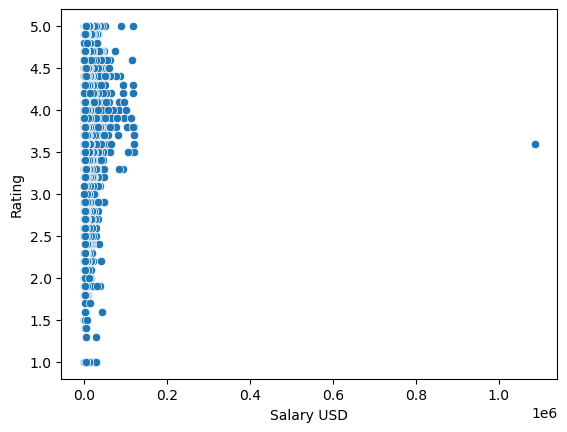

In [50]:
#plot between Salary USD and Rating
sns.scatterplot(x='Salary USD', y='Rating', data=sps)

In [56]:
sps[sps['Salary USD'] == sps['Salary USD'].max()]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE,1086749
